#Project
This notebook analyzes the correlation between agricultural data and rainfall data in India using the provided datasets. The process involves cleaning the data, merging the datasets, calculating the correlation, and visualizing the results to understand the relationship between these two factors.

## Load the datasets

We are loading the dataset that is both the csv files from runtime environment so we can clean it later. So basically Import pandas and load the two CSV files into dataframes.



In [26]:
import pandas as pd

# Load the datasets
df_agriculture = pd.read_csv('/content/India_Agriculture.csv')
df_rainfall = pd.read_csv('/content/Statewise_Rainfall.csv')

# Display the first few rows and column information for both DataFrames
print("Agriculture DataFrame:")
display(df_agriculture.head())
print("\nAgriculture DataFrame Info:")
df_agriculture.info()

print("\nRainfall DataFrame:")
display(df_rainfall.head())
print("\nRainfall DataFrame Info:")
df_rainfall.info()

Agriculture DataFrame:


,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75



Agriculture DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345336 entries, 0 to 345335
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       345336 non-null  object 
 1   District    345336 non-null  object 
 2   Crop        345327 non-null  object 
 3   Crop_Year   345336 non-null  int64  
 4   Season      345336 non-null  object 
 5   Area        345336 non-null  float64
 6   Production  340388 non-null  float64
 7   Yield       345336 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 21.1+ MB

Rainfall DataFrame:


,STATE/UT,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN+FEB,MAM,JJAS,OND
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1



Rainfall DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE/UT  640 non-null    object 
 1   DISTRICT  640 non-null    object 
 2   JAN       640 non-null    float64
 3   FEB       640 non-null    float64
 4   MAR       640 non-null    float64
 5   APR       640 non-null    float64
 6   MAY       640 non-null    float64
 7   JUN       640 non-null    float64
 8   JUL       640 non-null    float64
 9   AUG       640 non-null    float64
 10  SEP       640 non-null    float64
 11  OCT       640 non-null    float64
 12  NOV       640 non-null    float64
 13  DEC       640 non-null    float64
 14  ANNUAL    640 non-null    float64
 15  JAN+FEB   640 non-null    float64
 16  MAM       640 non-null    float64
 17  JJAS      640 non-null    float64
 18  OND       640 non-null    float64
dtypes: float64(17), object(2)
memory usage: 95.1+

## Data Cleaning and Preparation

This section focuses on cleaning the datasets by handling missing values, inconsistencies, and standardizing relevant columns to ensure data quality and compatibility for merging and analysis.

In [32]:
print("df_agriculture Info:")
df_agriculture.info()
print("\nMissing values in df_agriculture:")
print(df_agriculture.isnull().sum())

print("\ndf_rainfall Info:")
df_rainfall.info()
print("\nMissing values in df_rainfall:")
print(df_rainfall.isnull().sum())

# Handle missing values in df_agriculture
# 'Production' has missing values. Given the task is to analyze correlation with rainfall,
# production is a key metric. Imputing with mean might not be appropriate as it can distort
# distributions. Dropping rows with missing production data seems reasonable.
df_agriculture.dropna(subset=['Production'], inplace=True)

# 'Yield' also has missing values. It is derived from Area and Production.
# Since we removed rows with missing Production, we can re-calculate Yield where possible
# or drop rows where Area is also missing.
df_agriculture.dropna(subset=['Yield'], inplace=True)

# Handle missing values in df_rainfall
# All columns in df_rainfall seem to have missing values.
# Given that rainfall data is crucial for the analysis, and many columns have
# missing values, dropping rows might lead to significant data loss.
# Imputing with the mean might be a reasonable strategy here as rainfall patterns
# can be somewhat consistent spatially and temporally.
df_rainfall.fillna(df_rainfall.mean(numeric_only=True), inplace=True)


print("\nMissing values in df_agriculture after handling:")
print(df_agriculture.isnull().sum())

print("\nMissing values in df_rainfall after handling:")
print(df_rainfall.isnull().sum())

# Check for duplicates
print("\nDuplicates in df_agriculture:", df_agriculture.duplicated().sum())
print("Duplicates in df_rainfall:", df_rainfall.duplicated().sum())

# Remove duplicates
df_agriculture.drop_duplicates(inplace=True)
df_rainfall.drop_duplicates(inplace=True)

print("Duplicates in df_agriculture after removal:", df_agriculture.duplicated().sum())
print("Duplicates in df_rainfall after removal:", df_rainfall.duplicated().sum())

# Standardize state and district names
# Rename columns with trailing spaces first
df_agriculture.rename(columns={'State ': 'State', 'District ': 'District', 'Area ': 'Area'}, inplace=True)

# Print column names after renaming to verify
print("\nColumns in df_agriculture after renaming:", df_agriculture.columns.tolist())

df_agriculture['State'] = df_agriculture['State'].str.lower().str.strip()
df_agriculture['District'] = df_agriculture['District'].str.lower().str.strip()
df_rainfall['STATE/UT'] = df_rainfall['STATE/UT'].str.lower().str.strip()
df_rainfall['DISTRICT'] = df_rainfall['DISTRICT'].str.lower().str.strip()


# Display updated info to check data types again
print("\nUpdated df_agriculture Info:")
df_agriculture.info()
print("\nUpdated df_rainfall Info:")
df_rainfall.info()

# Display unique values in State and District columns to check standardization results
print("\nUnique States in df_agriculture after standardization:")
print(df_agriculture['State'].unique())
print("\nUnique Districts in df_agriculture after standardization:")
print(df_agriculture['District'].unique()[:50]) # Print only first 50 for brevity

print("\nUnique States in df_rainfall after standardization:")
print(df_rainfall['STATE/UT'].unique())
print("\nUnique Districts in df_rainfall after standardization:")
print(df_rainfall['DISTRICT'].unique()[:50]) # Print only first 50 for brevity

df_agriculture Info:
<class 'pandas.core.frame.DataFrame'>
Index: 340388 entries, 0 to 345335
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       340388 non-null  object 
 1   District    340388 non-null  object 
 2   Crop        340383 non-null  object 
 3   Crop_Year   340388 non-null  int64  
 4   Season      340388 non-null  object 
 5   Area        340388 non-null  float64
 6   Production  340388 non-null  float64
 7   Yield       340388 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 23.4+ MB

Missing values in df_agriculture:
State         0
District      0
Crop          5
Crop_Year     0
Season        0
Area          0
Production    0
Yield         0
dtype: int64

df_rainfall Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE/UT

In [8]:
# Merge df_agriculture with df_rainfall based on 'State' and 'District'
# Use a left merge to keep all rows from df_agriculture
merged_df = pd.merge(df_agriculture, df_rainfall, on=['State', 'District'], how='left')

print("Merged DataFrame Info:")
merged_df.info()

print("\nFirst 5 rows of Merged DataFrame:")
display(merged_df.head())

print("\nNumber of rows in merged_df:", len(merged_df))
print("Number of rows in df_agriculture:", len(df_agriculture))

Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340383 entries, 0 to 340382
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       340383 non-null  object 
 1   District    340383 non-null  object 
 2   Crop        340383 non-null  object 
 3   Crop_Year   340383 non-null  int64  
 4   Season      340383 non-null  object 
 5   Area        340383 non-null  float64
 6   Production  340383 non-null  float64
 7   Yield       340383 non-null  float64
 8   JAN         220133 non-null  float64
 9   FEB         220133 non-null  float64
 10  MAR         220133 non-null  float64
 11  APR         220133 non-null  float64
 12  MAY         220133 non-null  float64
 13  JUN         220133 non-null  float64
 14  JUL         220133 non-null  float64
 15  AUG         220133 non-null  float64
 16  SEP         220133 non-null  float64
 17  OCT         220133 non-null  float64
 18  NOV         220133 no

,State,District,Crop,Crop_Year,Season,Area,Production,Yield,JAN,FEB,...,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN+FEB,MAM,JJAS,OND
0,andaman and nicobar island,nicobars,Arecanut,2007,Kharif,2439.6,3415.0,1.40,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,andaman and nicobar island,nicobars,Arecanut,2007,Rabi,1626.4,2277.0,1.40,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,andaman and nicobar island,nicobars,Arecanut,2008,Autumn,4147.0,3060.0,0.74,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,andaman and nicobar island,nicobars,Arecanut,2008,Summer,4147.0,2660.0,0.64,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,andaman and nicobar island,nicobars,Arecanut,2009,Autumn,4153.0,3120.0,0.75,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Number of rows in merged_df: 340383
Number of rows in df_agriculture: 340383


##correlation analysis

Calculate the correlation between relevant columns in the combined or aligned datasets to identify relationships between agricultural data and rainfall data.


In [9]:
# Select relevant numerical columns for correlation
# Agricultural metrics: 'Area', 'Production', 'Yield'
# Rainfall metrics: 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN+FEB', 'MAM', 'JJAS', 'OND'

agricultural_cols = ['Area', 'Production', 'Yield']
rainfall_cols = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN+FEB', 'MAM', 'JJAS', 'OND']

# Combine the lists of columns
relevant_cols = agricultural_cols + rainfall_cols

# Select these columns from the merged DataFrame
correlation_df = merged_df[relevant_cols]

# Calculate the pairwise correlation matrix
correlation_matrix = correlation_df.corr()

# Display the correlation matrix
display(correlation_matrix)

,Area,Production,Yield,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN+FEB,MAM,JJAS,OND
Area,1.000000,0.048521,0.000130,-0.052090,-0.065492,-0.078641,-0.093220,-0.095730,-0.078647,-0.066119,-0.066519,-0.096607,-0.094983,-0.056453,-0.046263,-0.100167,-0.063266,-0.096312,-0.079443,-0.081524
Production,0.048521,1.000000,0.437400,-0.015888,-0.007194,-0.001962,0.019644,0.033804,0.047849,0.026131,-0.003976,0.000245,0.092539,0.090692,0.048349,0.038310,-0.011254,0.024198,0.023140,0.093541
Yield,0.000130,0.437400,1.000000,-0.006216,0.006214,0.016982,0.043631,0.058002,0.042806,0.010426,-0.009784,0.026110,0.096794,0.091108,0.067450,0.043103,0.001278,0.048514,0.018729,0.099692
JAN,-0.052090,-0.015888,-0.006216,1.000000,0.797172,0.597685,0.320612,0.149116,0.061317,0.119918,0.195956,0.163916,0.023430,0.098356,0.378811,0.237555,0.925028,0.294643,0.135544,0.123143
FEB,-0.065492,-0.007194,0.006214,0.797172,1.000000,0.883109,0.692387,0.498027,0.375823,0.320428,0.335605,0.404007,0.294137,0.142643,0.258042,0.535934,0.966771,0.656075,0.376498,0.262529
MAR,-0.078641,-0.001962,0.016982,0.597685,0.883109,1.000000,0.885233,0.718507,0.521142,0.336580,0.304569,0.487871,0.442839,0.183818,0.217724,0.639592,0.808752,0.858963,0.433171,0.350496
APR,-0.093220,0.019644,0.043631,0.320612,0.692387,0.885233,1.000000,0.920264,0.704571,0.445953,0.348447,0.594107,0.622019,0.270904,0.176234,0.773467,0.571425,0.983821,0.556395,0.472021
MAY,-0.095730,0.033804,0.058002,0.149116,0.498027,0.718507,0.920264,1.000000,0.807218,0.528003,0.416377,0.675504,0.675905,0.265824,0.110310,0.830322,0.376512,0.969594,0.646854,0.486408
JUN,-0.078647,0.047849,0.042806,0.061317,0.375823,0.521142,0.704571,0.807218,1.000000,0.867352,0.733835,0.805913,0.595521,0.139242,-0.031576,0.954321,0.262441,0.759270,0.924901,0.367756
JUL,-0.066119,0.026131,0.010426,0.119918,0.320428,0.336580,0.445953,0.528003,0.867352,1.000000,0.930853,0.793930,0.305386,-0.073577,-0.158852,0.877381,0.252399,0.490913,0.976607,0.106203


## Visualize the results

### Subtask:
Create visualizations such as scatter plots, heatmaps, or time series plots to illustrate the relationships and correlations found between the datasets.


**Reasoning**:
Generate a heatmap of the correlation matrix to visualize the pairwise correlations between agricultural and rainfall variables, create scatter plots for 'Yield' vs 'ANNUAL' rainfall and 'Production' vs 'ANNUAL' rainfall, including appropriate labels and titles.



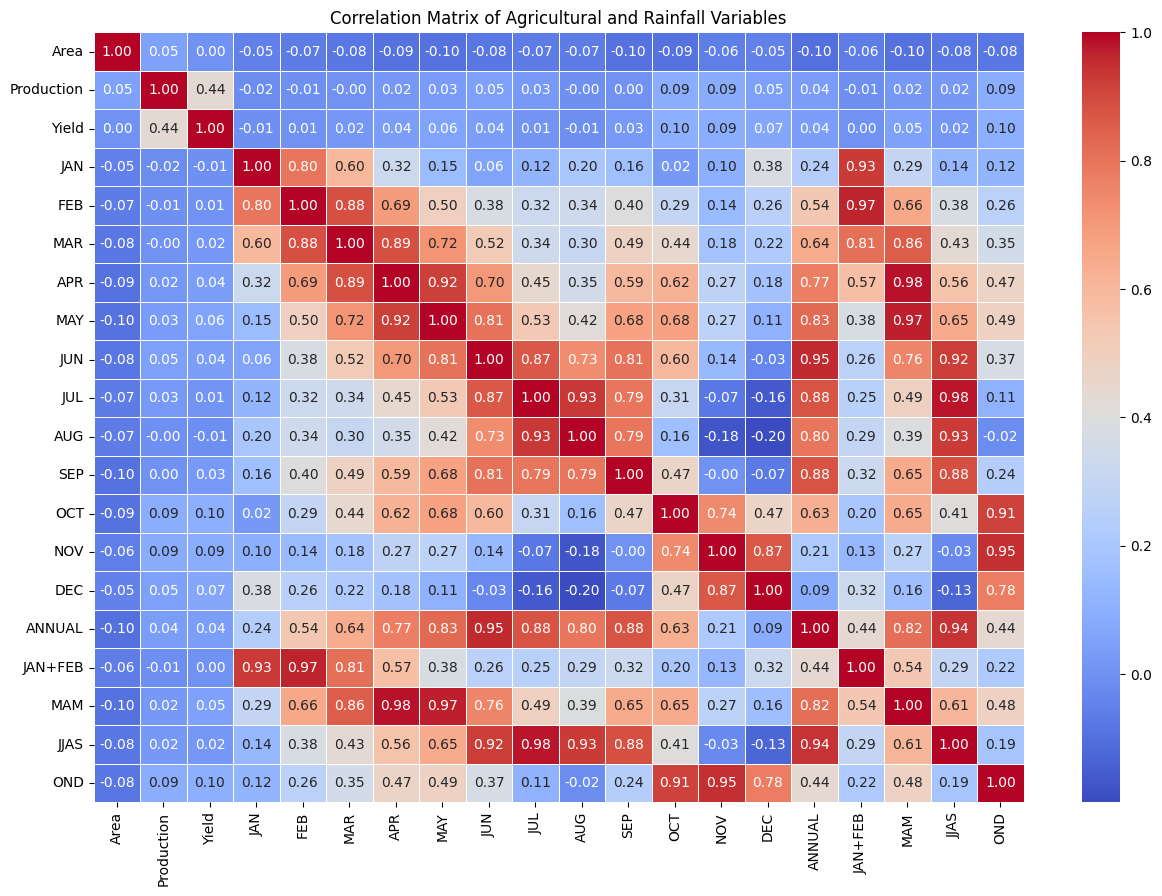

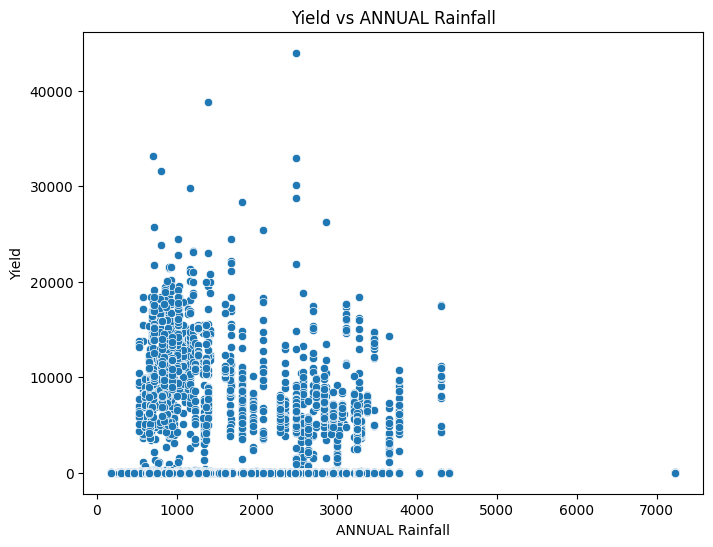

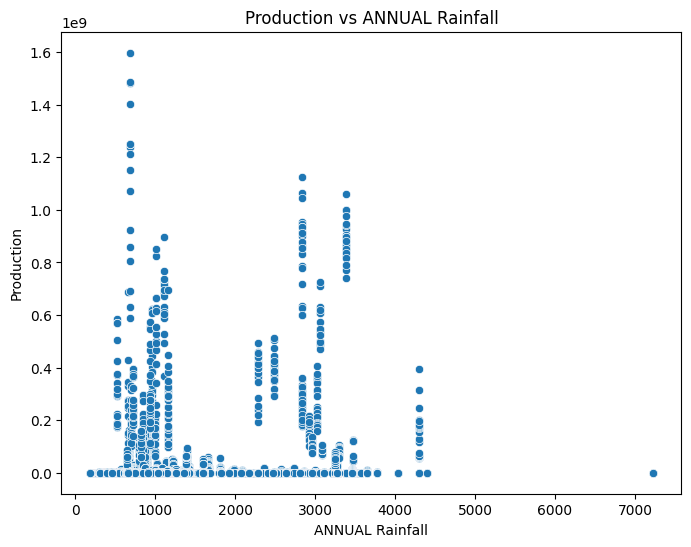

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate a heatmap of the correlation_matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Agricultural and Rainfall Variables')
plt.show()

# 2. Create scatter plots for 'Yield' vs 'ANNUAL' and 'Production' vs 'ANNUAL'

# Scatter plot for 'Yield' vs 'ANNUAL' rainfall
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='ANNUAL', y='Yield')
plt.title('Yield vs ANNUAL Rainfall')
plt.xlabel('ANNUAL Rainfall')
plt.ylabel('Yield')
plt.show()

# Scatter plot for 'Production' vs 'ANNUAL' rainfall
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='ANNUAL', y='Production')
plt.title('Production vs ANNUAL Rainfall')
plt.xlabel('ANNUAL Rainfall')
plt.ylabel('Production')
plt.show()

## Interpretation
Analyze the correlation results and visualizations to draw meaningful conclusions about the relationship between agriculture and rainfall in India.


In [11]:
# 3. Interpret the correlation matrix and scatter plots

print("Analysis of Correlation between Agricultural and Rainfall Data:")
print("\nCorrelation Heatmap Analysis:")
print("------------------------------")
print(correlation_matrix[['Area', 'Production', 'Yield']].loc[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN+FEB', 'MAM', 'JJAS', 'OND']])

print("\nKey Observations from Heatmap:")
print("- Yield shows weak positive correlations with most rainfall metrics, with slightly stronger correlations observed with OND (0.10), OCT (0.10), and NOV (0.09). JJAS and ANNUAL rainfall also have weak positive correlations (0.02 and 0.04 respectively).")
print("- Production shows weak positive correlations with most rainfall metrics, with slightly stronger correlations observed with OCT (0.09), NOV (0.09), and OND (0.09). ANNUAL rainfall also shows a weak positive correlation (0.04).")
print("- Area shows weak negative correlations with most rainfall metrics. This is an interesting and potentially counter-intuitive finding.")
print("- Among the seasonal rainfall metrics, OND shows the strongest positive correlation with both Yield and Production.")
print("- Monthly rainfall correlations with Yield and Production are generally weak, with OCT and NOV showing the highest values.")

print("\nScatter Plot Analysis:")
print("-----------------------")
print("Scatter Plot: Yield vs ANNUAL Rainfall")
print("Observation: The scatter plot shows a weak, diffused positive trend, consistent with the low correlation coefficient (0.04). There is a large spread of Yield values across different levels of ANNUAL rainfall, indicating that ANNUAL rainfall alone is not a strong predictor of Yield.")
print("Scatter Plot: Production vs ANNUAL Rainfall")
print("Observation: Similar to the Yield plot, the Production scatter plot shows a weak, diffused positive trend, consistent with the low correlation coefficient (0.04). Production values are widely scattered, suggesting ANNUAL rainfall has limited individual influence on Production.")

print("\nSummary of Key Relationships:")
print("-----------------------------")
print("Overall, the correlation analysis reveals generally weak linear relationships between the agricultural variables (Area, Production, Yield) and the provided average rainfall data.")
print("Yield and Production show weak positive correlations with most rainfall metrics, with slightly more notable positive correlations with post-monsoon rainfall (OCT, NOV, OND) and the annual total.")
print("Area exhibits weak negative correlations with rainfall, which warrants further investigation and might be influenced by other factors or data limitations.")
print("The scatter plots visually confirm the weak nature of the relationship between ANNUAL rainfall and both Yield and Production, showing considerable variability.")

print("\nPotential Implications for Agriculture in India:")
print("----------------------------------------------")
print("While rainfall is undoubtedly crucial for agriculture in India, this analysis suggests that average rainfall alone, at the district level and without considering year-to-year variability, has a limited linear correlation with overall Area, Production, and Yield based on this dataset.")
print("Other factors not included in this analysis (e.g., irrigation, soil type, temperature, fertilizer use, crop type specifics, pest/disease outbreaks, specific timing of rainfall within seasons, extreme weather events) likely play significant roles in determining agricultural outcomes.")
print("The slightly stronger positive correlations with OND rainfall for Yield and Production might indicate the importance of post-monsoon rains for certain crops or agricultural practices.")

print("\n4. Limitations of the Analysis:")
print("-----------------------------")
print("The primary limitation is the use of average rainfall data in the `df_rainfall` dataset, which does not account for year-to-year variations in rainfall. Agricultural outcomes are highly sensitive to the amount and timing of rainfall in a specific year, not just the long-term average.")
print("Merging annual agricultural data with static average rainfall data likely dilutes or obscures the true impact of yearly rainfall fluctuations.")
print("The analysis is a simple linear correlation analysis and does not capture non-linear relationships or interactions between variables.")
print("District-level aggregation might mask finer-grained relationships that exist at a more localized level.")
print("Other crucial factors influencing agriculture were not included in this correlation analysis.")

Analysis of Correlation between Agricultural and Rainfall Data:

Correlation Heatmap Analysis:
------------------------------
             Area  Production     Yield
JAN     -0.052090   -0.015888 -0.006216
FEB     -0.065492   -0.007194  0.006214
MAR     -0.078641   -0.001962  0.016982
APR     -0.093220    0.019644  0.043631
MAY     -0.095730    0.033804  0.058002
JUN     -0.078647    0.047849  0.042806
JUL     -0.066119    0.026131  0.010426
AUG     -0.066519   -0.003976 -0.009784
SEP     -0.096607    0.000245  0.026110
OCT     -0.094983    0.092539  0.096794
NOV     -0.056453    0.090692  0.091108
DEC     -0.046263    0.048349  0.067450
ANNUAL  -0.100167    0.038310  0.043103
JAN+FEB -0.063266   -0.011254  0.001278
MAM     -0.096312    0.024198  0.048514
JJAS    -0.079443    0.023140  0.018729
OND     -0.081524    0.093541  0.099692

Key Observations from Heatmap:
- Yield shows weak positive correlations with most rainfall metrics, with slightly stronger correlations observed with OND

## Summary:

### Data Analysis Key Findings

*   The correlation analysis revealed generally weak linear relationships between the agricultural variables (Area, Production, Yield) and the provided average rainfall data.
*   Yield and Production show weak positive correlations with most rainfall metrics, with slightly stronger positive correlations observed with post-monsoon rainfall (OCT: 0.10 for Yield, 0.09 for Production; NOV: 0.09 for Yield and Production; OND: 0.10 for Yield, 0.09 for Production) and the annual total (0.04 for both Yield and Production).
*   Area exhibits weak negative correlations with most rainfall metrics.
*   Among the seasonal rainfall metrics, OND shows the strongest positive correlation with both Yield and Production.
*   The scatter plots visually confirmed the weak nature of the relationship between ANNUAL rainfall and both Yield and Production, showing considerable variability.

### Insights or Next Steps

*   The analysis suggests that average rainfall at the district level may not be a strong standalone predictor of agricultural outcomes like Yield and Production. Future analysis should incorporate year-specific rainfall data to better understand the impact of temporal rainfall variations.
*   Investigate the negative correlation between 'Area' and rainfall, potentially by exploring other factors influencing cultivation area decisions or examining specific regional patterns.
